<a href="https://colab.research.google.com/github/dietmarja/LLM-Elements/blob/main/LoRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch [10/100], Loss: 0.5273
Epoch [20/100], Loss: 0.3148
Epoch [30/100], Loss: 0.1951
Epoch [40/100], Loss: 0.1264
Epoch [50/100], Loss: 0.0825
Epoch [60/100], Loss: 0.0520
Epoch [70/100], Loss: 0.0319
Epoch [80/100], Loss: 0.0191
Epoch [90/100], Loss: 0.0112
Epoch [100/100], Loss: 0.0064
Training with LoRA rank 1...
Epoch [10/100], Loss: 0.6280
Epoch [20/100], Loss: 0.3573
Epoch [30/100], Loss: 0.2179
Epoch [40/100], Loss: 0.1566
Epoch [50/100], Loss: 0.1157
Epoch [60/100], Loss: 0.0906
Epoch [70/100], Loss: 0.0718
Epoch [80/100], Loss: 0.0565
Epoch [90/100], Loss: 0.0439
Epoch [100/100], Loss: 0.0334
Training with LoRA rank 2...
Epoch [10/100], Loss: 0.4906
Epoch [20/100], Loss: 0.2561
Epoch [30/100], Loss: 0.1689
Epoch [40/100], Loss: 0.1260
Epoch [50/100], Loss: 0.0965
Epoch [60/100], Loss: 0.0719
Epoch [70/100], Loss: 0.0485
Epoch [80/100], Loss: 0.0293
Epoch [90/100], Loss: 0.0166
Epoch [100/100], Loss: 0.0099
Training with LoRA rank 3...
Epoch [10/100], Loss: 0.5978
Epoch [20/1

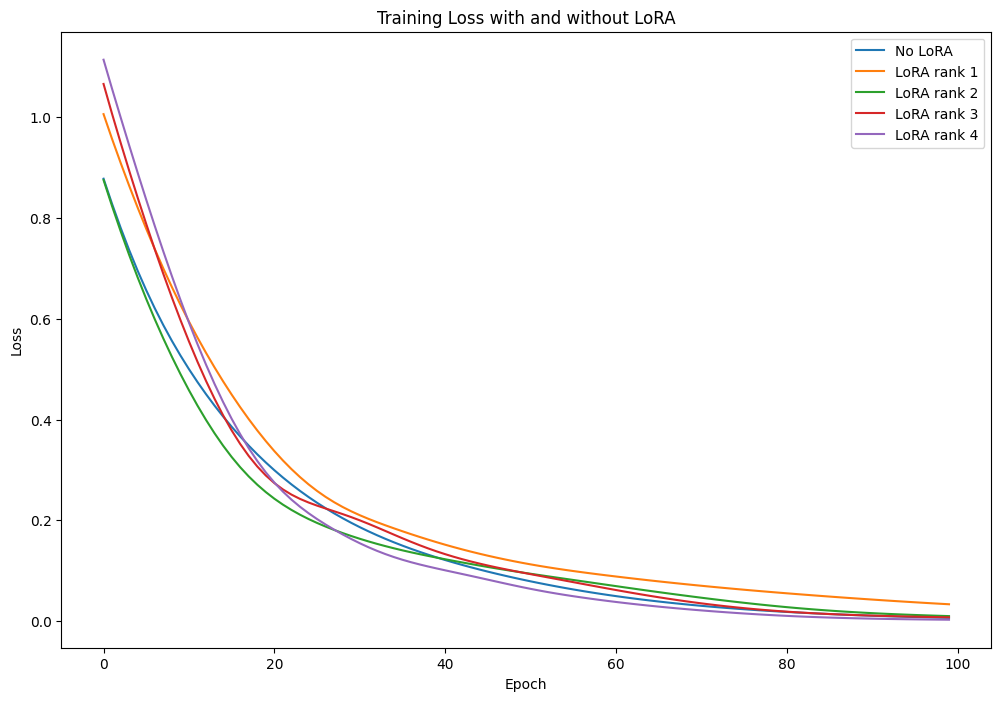

Evaluating model with No LoRA...
Predictions: tensor([[-0.7229,  0.0307, -0.2637,  0.0366,  0.3943],
        [ 0.6702, -0.3203,  0.1540,  0.7425, -0.5364]])
Evaluating model with LoRA rank 1...
Predictions: tensor([[-0.6959,  1.0401,  0.9862, -0.7857, -1.0006],
        [ 0.9510,  0.7587, -0.9854, -0.5834,  0.8960]])
Evaluating model with LoRA rank 2...
Predictions: tensor([[ 1.2549,  0.3674,  0.1515,  1.5715, -0.9896],
        [-0.0192, -0.3599, -1.0034, -0.6801, -0.3607]])
Evaluating model with LoRA rank 3...
Predictions: tensor([[ 1.3481,  1.1502, -0.3771,  0.9210, -0.2608],
        [ 0.4672,  0.1049, -0.7196, -0.0512,  0.4508]])
Evaluating model with LoRA rank 4...
Predictions: tensor([[ 0.7219,  0.7255,  0.9101,  1.0988, -0.0884],
        [ 0.2760, -0.6891, -0.5859, -0.7713,  0.5590]])


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# LoRA Layer Definition
class LoRALayer(nn.Module):
    def __init__(self, in_features, out_features, rank):
        super(LoRALayer, self).__init__()
        self.rank = rank
        self.W = nn.Linear(in_features, out_features, bias=False)
        self.A = nn.Linear(in_features, rank, bias=False)
        self.B = nn.Linear(rank, out_features, bias=False)

        # Initialize A and B with small values
        nn.init.normal_(self.A.weight, std=0.01)
        nn.init.normal_(self.B.weight, std=0.01)

    def forward(self, x):
        return self.W(x) + self.B(self.A(x))

# Simple Model Definition
class SimpleModel(nn.Module):
    def __init__(self, input_dim, output_dim, lora_rank=None):
        super(SimpleModel, self).__init__()
        if lora_rank:
            self.layer = LoRALayer(input_dim, output_dim, lora_rank)
        else:
            self.layer = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.layer(x)

# Training Function
def train_model(model, inputs, targets, epochs=100):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    losses = []
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        losses.append(loss.item())
        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

    return losses

# Evaluation Function
def evaluate_model(model, test_inputs):
    model.eval()
    with torch.no_grad():
        predictions = model(test_inputs)
        print(f'Predictions: {predictions}')

# Define model parameters
input_dim = 10
output_dim = 5

# Dummy data for demonstration
inputs = torch.randn(8, input_dim)
targets = torch.randn(8, output_dim)

# LoRA ranks to evaluate
lora_ranks = [1, 2, 3, 4]

# Dictionary to store all losses
all_losses = {"No LoRA": train_model(SimpleModel(input_dim, output_dim), inputs, targets)}

# Train models with different LoRA ranks
for rank in lora_ranks:
    print(f"Training with LoRA rank {rank}...")
    model_lora = SimpleModel(input_dim, output_dim, rank)
    losses_lora = train_model(model_lora, inputs, targets)
    all_losses[f"LoRA rank {rank}"] = losses_lora

# Plot the losses for all models
plt.figure(figsize=(12, 8))
for label, losses in all_losses.items():
    plt.plot(losses, label=label)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss with and without LoRA')
plt.legend()
plt.show()

# Example prediction
test_inputs = torch.randn(2, input_dim)
for rank in ["No LoRA"] + [f"LoRA rank {r}" for r in lora_ranks]:
    print(f"Evaluating model with {rank}...")
    model = SimpleModel(input_dim, output_dim) if rank == "No LoRA" else SimpleModel(input_dim, output_dim, int(rank.split()[-1]))
    evaluate_model(model, test_inputs)


Epoch [10/100], Loss: 0.4652
Epoch [20/100], Loss: 0.2688
Epoch [30/100], Loss: 0.1676
Epoch [40/100], Loss: 0.1151
Epoch [50/100], Loss: 0.0790
Epoch [60/100], Loss: 0.0547
Epoch [70/100], Loss: 0.0390
Epoch [80/100], Loss: 0.0282
Epoch [90/100], Loss: 0.0204
Epoch [100/100], Loss: 0.0148
Training with LoRA rank 1...
Epoch [10/100], Loss: 0.4770
Epoch [20/100], Loss: 0.2523
Epoch [30/100], Loss: 0.1662
Epoch [40/100], Loss: 0.1163
Epoch [50/100], Loss: 0.0926
Epoch [60/100], Loss: 0.0823
Epoch [70/100], Loss: 0.0777
Epoch [80/100], Loss: 0.0746
Epoch [90/100], Loss: 0.0721
Epoch [100/100], Loss: 0.0698
Full-rank weight matrix (W): 
tensor([[-0.1209, -0.0256, -0.1713, -0.3623,  0.0871, -0.0150, -0.3602, -0.3070,
          0.4909,  0.3351],
        [ 0.0557, -0.4946, -0.2769, -0.2984, -0.4398,  0.3318, -0.0901,  0.1211,
          0.0391, -0.3899],
        [ 0.2977,  0.3901,  0.3488,  0.1498, -0.2749,  0.1921,  0.2461, -0.0200,
          0.0161, -0.1447],
        [ 0.5475, -0.0213, -0.31

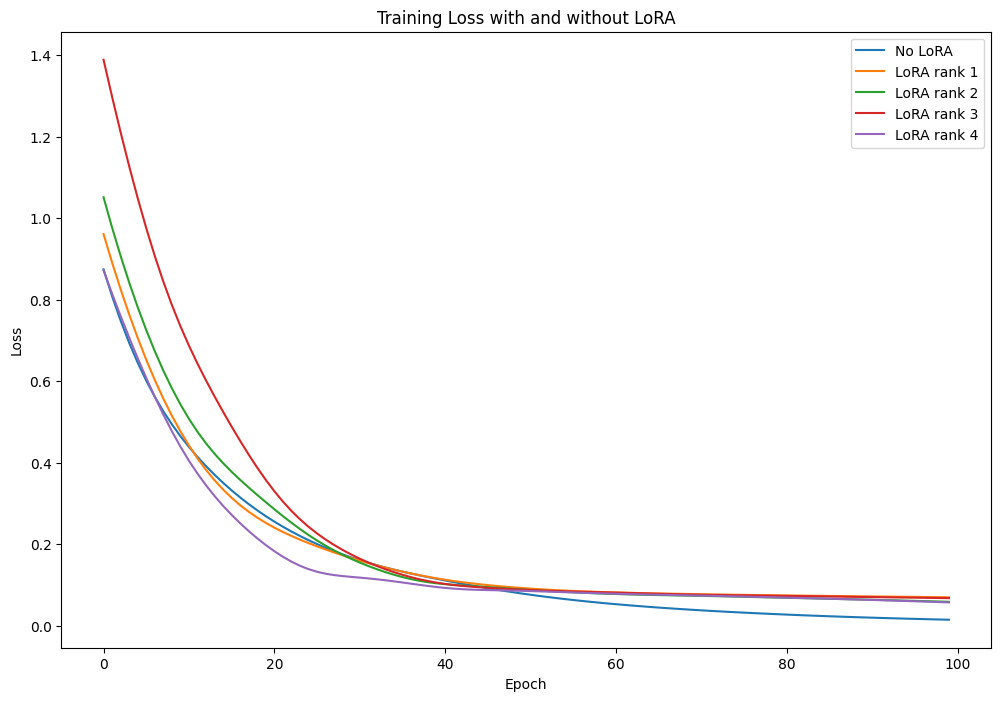

Evaluating model with No LoRA...
Predictions: tensor([[ 0.2346, -0.7851,  0.7993, -0.7871, -0.0334],
        [-0.2020,  0.3929,  0.1469,  0.1209,  0.6595]])
Evaluating model with LoRA rank 1...
Predictions: tensor([[-0.1743, -0.8360,  0.7164,  0.9552, -0.3914],
        [ 0.0714,  0.7140, -0.6027, -0.2530, -0.2371]])
Evaluating model with LoRA rank 2...
Predictions: tensor([[-0.8026, -0.8615, -0.9833, -0.4970, -0.8166],
        [ 0.2337,  0.2256,  0.4504,  0.0824, -0.1350]])
Evaluating model with LoRA rank 3...
Predictions: tensor([[-1.1480,  0.2111, -1.3907, -0.7333, -1.0598],
        [ 0.4980, -0.3483,  0.8971,  0.1332,  0.7971]])
Evaluating model with LoRA rank 4...
Predictions: tensor([[-0.3395,  0.3906, -0.5805, -1.1966,  0.2286],
        [ 0.3886, -0.1830,  0.2984,  0.0971, -0.7308]])


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# LoRA Layer Definition
class LoRALayer(nn.Module):
    def __init__(self, in_features, out_features, rank):
        super(LoRALayer, self).__init__()
        self.rank = rank
        self.W = nn.Linear(in_features, out_features, bias=False)
        self.A = nn.Linear(in_features, rank, bias=False)
        self.B = nn.Linear(rank, out_features, bias=False)

        # Initialize A and B with small values
        nn.init.normal_(self.A.weight, std=0.01)
        nn.init.normal_(self.B.weight, std=0.01)

    def forward(self, x):
        return self.W(x) + self.B(self.A(x))

    def print_weights(self):
        print(f"Full-rank weight matrix (W): \n{self.W.weight.data}")
        print(f"Low-rank weight matrix A: \n{self.A.weight.data}")
        print(f"Low-rank weight matrix B: \n{self.B.weight.data}")

# Simple Model Definition
class SimpleModel(nn.Module):
    def __init__(self, input_dim, output_dim, lora_rank=None):
        super(SimpleModel, self).__init__()
        if lora_rank:
            self.layer = LoRALayer(input_dim, output_dim, lora_rank)
        else:
            self.layer = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.layer(x)

    def print_weights(self):
        if isinstance(self.layer, LoRALayer):
            self.layer.print_weights()
        else:
            print(f"Full-rank weight matrix (W): \n{self.layer.weight.data}")

# Training Function
def train_model(model, inputs, targets, epochs=100):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    losses = []
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        losses.append(loss.item())
        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

    return losses

# Evaluation Function
def evaluate_model(model, test_inputs):
    model.eval()
    with torch.no_grad():
        predictions = model(test_inputs)
        print(f'Predictions: {predictions}')

# Define model parameters
input_dim = 10
output_dim = 5

# Dummy data for demonstration
inputs = torch.randn(8, input_dim)
targets = torch.randn(8, output_dim)

# LoRA ranks to evaluate
lora_ranks = [1, 2, 3, 4]

# Dictionary to store all losses
all_losses = {"No LoRA": train_model(SimpleModel(input_dim, output_dim), inputs, targets)}

# Train models with different LoRA ranks
for rank in lora_ranks:
    print(f"Training with LoRA rank {rank}...")
    model_lora = SimpleModel(input_dim, output_dim, rank)
    losses_lora = train_model(model_lora, inputs, targets)
    all_losses[f"LoRA rank {rank}"] = losses_lora
    model_lora.print_weights()

# Plot the losses for all models
plt.figure(figsize=(12, 8))
for label, losses in all_losses.items():
    plt.plot(losses, label=label)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss with and without LoRA')
plt.legend()
plt.show()

# Example prediction
test_inputs = torch.randn(2, input_dim)
for rank in ["No LoRA"] + [f"LoRA rank {r}" for r in lora_ranks]:
    print(f"Evaluating model with {rank}...")
    model = SimpleModel(input_dim, output_dim) if rank == "No LoRA" else SimpleModel(input_dim, output_dim, int(rank.split()[-1]))
    evaluate_model(model, test_inputs)
